In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import menpo.io as mio
from conversion import landmarkConverter
from setup import process, prepare_images
from os import walk
%matplotlib inline

Found 162 assets, index the returned LazyList to import.
Found 72 assets, index the returned LazyList to import.
Found 174 assets, index the returned LazyList to import.
Found 96 assets, index the returned LazyList to import.
Found 111 assets, index the returned LazyList to import.
Found 231 assets, index the returned LazyList to import.
Found 48 assets, index the returned LazyList to import.


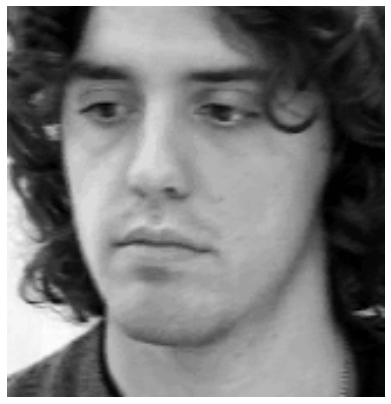

In [2]:
training_images = prepare_images('/Data/Images/048-aa048/')
training_images[500].view()

In [3]:
from menpofit.aam import HolisticAAM
from menpo.feature import fast_dsift
from menpo.shape import TriMesh
import numpy as np

aam = HolisticAAM(training_images, group='landmarks', diagonal=150,
                  scales=(0.5, 1.0), holistic_features=fast_dsift, verbose=True,
                  max_shape_components=20, max_appearance_components=150)

- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (894/894) - done.                  
  - Scale 0: Warping images: [          ] 3% (35/894) - 00:00:03 remaining      ining

/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)
/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpo/image/boolean.py:711: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  copy.pixels[slices].flat = point_in_pointcloud(pointcloud, indices)


  - Scale 0: Doneding appearance model                                          
  - Scale 1: Doneding appearance model                                          
                                                              

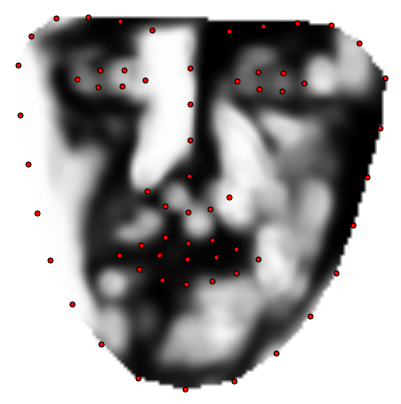

In [51]:
aam.view_appearance_models_widget()

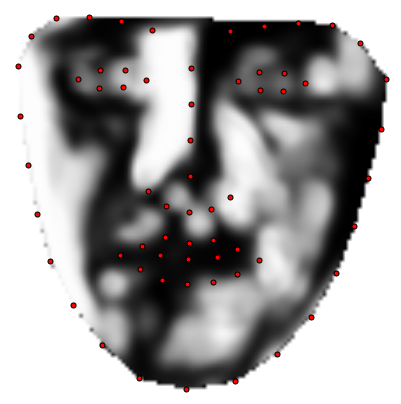

In [56]:
app = aam.appearance_models[-1]
capp = app.mean()
aam.view_aam_widget()

In [11]:
#capp.view_landmarks()

In [28]:
#capp.as_vector()
app.components

array([[ 6.76797356e-03,  6.42206480e-03,  5.23473944e-03, ...,
        -1.38045292e-04, -7.80315043e-04, -1.61932056e-03],
       [ 6.33628135e-04,  1.49608328e-03,  1.41514720e-03, ...,
        -8.19201439e-04, -2.02018146e-03, -3.48333812e-03],
       [-5.94508904e-05, -1.19749358e-03, -2.21062286e-03, ...,
         5.45620402e-04,  2.90156617e-03,  5.74007148e-03],
       ...,
       [-5.18470620e-04,  1.91046277e-04,  6.19440918e-04, ...,
        -1.87953253e-04,  3.12012766e-04, -2.84930145e-04],
       [ 1.59900791e-03,  2.23517587e-04,  1.81987064e-05, ...,
         7.53269146e-04,  1.26493365e-06, -1.05595094e-03],
       [ 3.12606135e-04,  1.59201626e-03,  3.63248834e-03, ...,
        -8.96173326e-04, -1.86288629e-03, -3.37389978e-03]])

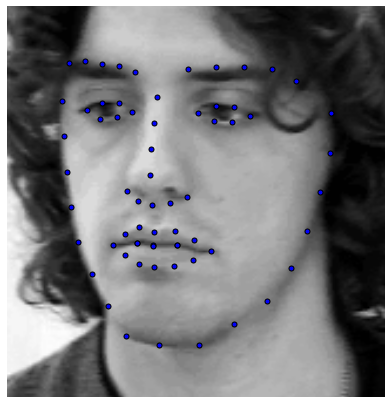

In [4]:
from menpofit.aam import LucasKanadeAAMFitter, WibergInverseCompositional
fitter = LucasKanadeAAMFitter(aam)#, lk_algorithm_cls=WibergInverseCompositional,
                           #   n_shape=[5, 20], n_appearance=[30, 150])
#image = mio.import_image('/Data/Images/043-jh043/jh043t1afaff/jh043t1afaff017.png')
#process(image)
image = training_images[500]


1 detected faces.


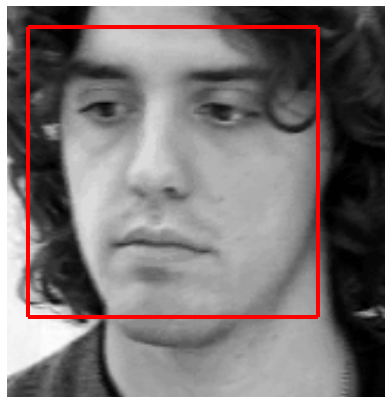

In [5]:
from menpodetect import load_dlib_frontal_face_detector

# Load detector
detect = load_dlib_frontal_face_detector()

# Detect
bboxes = detect(image)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    image.view_landmarks(group='dlib_0', line_colour='red',
                         render_markers=False, line_width=4);

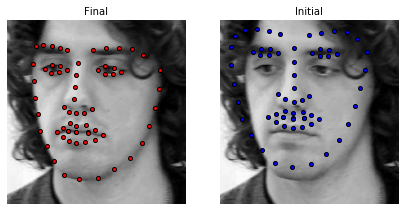

In [57]:
# initial bbox
initial_bbox = bboxes[0]

# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=[15, 5])

# print result
result.view()
result.view(render_initial_shape=True)

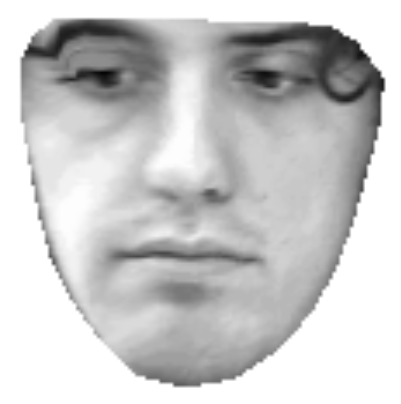

In [82]:
mod = fitter.appearance_reconstructions(result.appearance_parameters,result.n_iters_per_scale)
f = fitter.warped_images(image, result.shapes)
f[17].view()

In [84]:
from setup import prepare_labels
labels = prepare_labels(training_images)

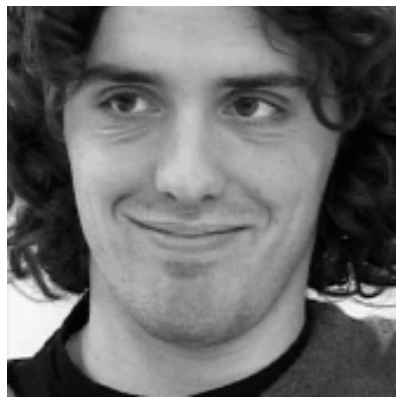

In [89]:
img2 = training_images[253]
img2.view()

1 detected faces.


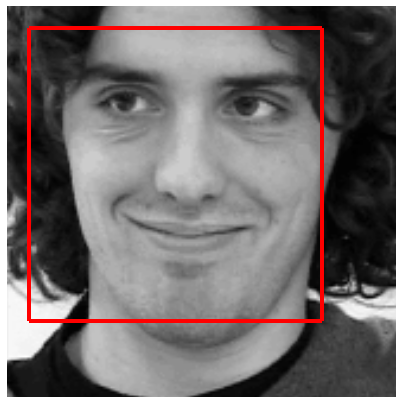

In [91]:
# Load detector
detect = load_dlib_frontal_face_detector()

# Detect
bboxes = detect(img2)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    img2.view_landmarks(group='dlib_0', line_colour='red',
                         render_markers=False, line_width=4);

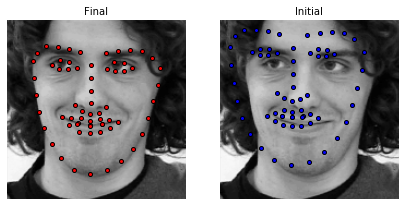

In [95]:
# initial bbox
initial_bbox = bboxes[0]

# fit image
result = fitter.fit_from_bb(img2, initial_bbox, max_iters=[35, 5])

# print result
result.view()
result.view(render_initial_shape=True)

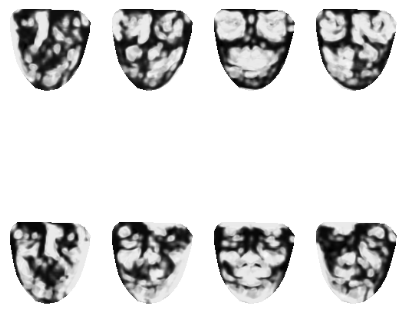

In [136]:
mod = fitter.appearance_reconstructions(result.appearance_parameters,result.n_iters_per_scale)[-1]


f = fitter.warped_images(img2, result.shapes)

mod.view()

#f[-1].view()

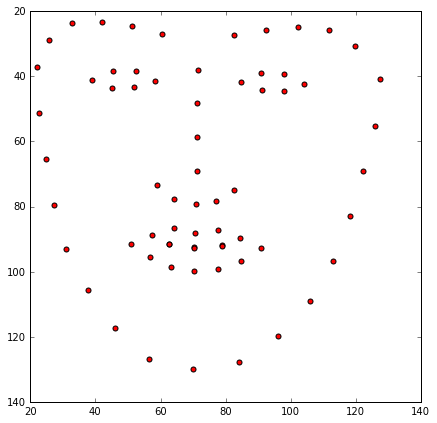

In [135]:
fitter.reference_shape.view()